![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Pandas - Series


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Hands on! - The Group Of Seven example

We'll start analyzing "[The Group of Seven](https://en.wikipedia.org/wiki/Group_of_Seven)". Which is a political formed by Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. We'll start by analyzing population, and for that, we'll use a `pandas.Series` object.

<img width="350" src="https://user-images.githubusercontent.com/872296/38149656-b5ce9816-3431-11e8-88e4-195756e25355.png" />

^^^ We will create the frame which will represent above (step by step)

In [9]:
import pandas as pd
import numpy as np

In [ ]:
# recall numpy creation

lst = [35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523]  # In millions
arr = np.array(lst)
arr

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

In [13]:
# creating series quite similar

lst = [35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523]  # In millions
g7_pop = pd.Series(lst)
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
dtype: float64

Note that above series has default range index of index by default. We will assign string index soon.

And also that series does NOT have name yet. Someone might not know we're representing population in millions of inhabitants. Series can have a `name`, to better document the purpose of the Series:

In [10]:
g7_pop.name = "G7 Population in millions"
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

# Series are pretty similar to numpy arrays:

They're actually backed by numpy arrays:

In [17]:
g7_pop.dtype

dtype('float64')

In [18]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

In [19]:
type(g7_pop.values)

numpy.ndarray

In [21]:
g7_pop.values.mean().round(1), g7_pop.values.sum().round(1), g7_pop.values.max()

(np.float64(107.3), np.float64(751.1), np.float64(318.523))

# Index

Indexing works similarly to lists and dictionaries, you use the **index** of the element you're looking for:

In [22]:
g7_pop  # recall

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

## numerical index

so far we do have integer range index

In [23]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [24]:
g7_pop[4], g7_pop[1], g7_pop[0], g7_pop[2]

(np.float64(127.061),
 np.float64(63.951),
 np.float64(35.467),
 np.float64(80.94))

In [22]:
g7_pop[1:-1]

1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
Name: G7 Population in millions, dtype: float64

## string Index

And they _look_ like simple Python lists or Numpy Arrays. But they're actually more similar to Python `dict`s.
A Series has an `index`, that's similar to the automatic index assigned to Python's lists:
But, in contrast to lists, we can explicitly define the index:


In [26]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

In [ ]:
g7_pop.index = [
    "Canada",
    "France",
    "Germany",
    "Italy",
    "Japan",
    "United Kingdom",
    "United States",
]  # String index possible, which is really similar to python dict - keys

g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [35]:
g7_pop["Canada"]

np.float64(35.467)

In [33]:
g7_pop["Japan"]

np.float64(127.061)

In [36]:
g7_pop[["Germany", "France", "Italy"]]

Germany    80.940
France     63.951
Italy      60.665
Name: G7 Population in millions, dtype: float64

In [42]:
g7_pop[0]

/var/folders/0s/p6r6pj_15m5cg5q_gj8_xdjm0000gn/T/ipykernel_58006/2572533557.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g7_pop[0]


np.float64(35.467)

In [43]:
g7_pop[:5]

Canada      35.467
France      63.951
Germany     80.940
Italy       60.665
Japan      127.061
Name: G7 Population in millions, dtype: float64

In [44]:
g7_pop["Canada":"Japan"]

Canada      35.467
France      63.951
Germany     80.940
Italy       60.665
Japan      127.061
Name: G7 Population in millions, dtype: float64

### key error case or not

In [45]:
g7_pop[["Spain", "Germany", "France", "Italy"]]  # error. We expect key error right?

KeyError: "['Spain'] not in index"

HOWEVER below won't result error even though with Spain index again. Why?

In [46]:
pd.Series(g7_pop, index=["Spain", "Germany", "France", "Italy"])  # this is re-creation

Spain         NaN
Germany    80.940
France     63.951
Italy      60.665
Name: G7 Population in millions, dtype: float64

## loc

In [47]:
g7_pop.loc["Canada"]

np.float64(35.467)

In [50]:
g7_pop.loc["Japan"]

np.float64(127.061)

In [51]:
g7_pop.loc["Italy"], g7_pop["Italy"]

(np.float64(60.665), np.float64(60.665))

we are going to learn later. we can use conditional indexing using `loc`

## iloc

Numeric positions can also be used, with the `iloc` attribute:

In [52]:
g7_pop.iloc[2]  # only integer possible

np.float64(80.94)

In [55]:
# g7_pop.iloc["Italy"]  # error. KEY_ERROR X,  TYPE_ERROR

In [57]:
g7_pop.iloc[[0, 1, 1, 2, 2, 2, 1]]

Canada     35.467
France     63.951
France     63.951
Germany    80.940
Germany    80.940
Germany    80.940
France     63.951
Name: G7 Population in millions, dtype: float64

In [59]:
g7_pop.iloc[1:4]  # range index using integer

France     63.951
Germany    80.940
Italy      60.665
Name: G7 Population in millions, dtype: float64

Slicing also works, but **important**, in Pandas, the upper limit is also included:

### more indexing examples

try below and quiz yourself

```python
g7_pop[:5]
g7_pop[4:6]
g7_pop["Canada":"Japan"]
g7_pop["Japan":"Canada"]


---
## Conditional selection (boolean arrays)

The same boolean array techniques we saw applied to numpy arrays can be used for Pandas `Series`:

In [60]:
g7_pop  # recall

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [62]:
g7_pop[g7_pop > 70]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [ ]:
g7_pop[g7_pop > 70].mean()

236.00033333333332

In [63]:
g7_pop.mean()

np.float64(107.30257142857144)

In [ ]:
g7_pop[g7_pop > g7_pop.mean()]

United States    500.0
Name: G7 Population in millions, dtype: float64

In [64]:
g7_pop.std(), g7_pop.mean(), g7_pop.max(), g7_pop.min()

(np.float64(97.24996987121581),
 np.float64(107.30257142857144),
 np.float64(318.523),
 np.float64(35.467))

In [65]:
g7_pop.describe()  # summary of statistics

count      7.000000
mean     107.302571
std       97.249970
min       35.467000
25%       62.308000
50%       64.511000
75%      104.000500
max      318.523000
Name: G7 Population in millions, dtype: float64

#### multi-conditions using OR AND.
| or

& and

In [67]:
g7_pop[
    (g7_pop > g7_pop.mean() - g7_pop.std() / 2)
    | (g7_pop > g7_pop.mean() + g7_pop.std() / 2)
]

France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [68]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

Canada            35.467
Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [69]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

Germany     80.940
Japan      127.061
Name: G7 Population in millions, dtype: float64

#### Using NOT
- ~ not

In [71]:
g7_pop[g7_pop > 80]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [72]:
g7_pop[~(g7_pop > 80)]

Canada            35.467
France            63.951
Italy             60.665
United Kingdom    64.511
Name: G7 Population in millions, dtype: float64

---
## Operations and methods (modifying series)
Series also support vectorized operations and aggregation functions as Numpy:

In [73]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [75]:
g7_pop * 1_000_000  # broadcasting

Canada             35467000.0
France             63951000.0
Germany            80940000.0
Italy              60665000.0
Japan             127061000.0
United Kingdom     64511000.0
United States     318523000.0
Name: G7 Population in millions, dtype: float64

In [77]:
np.log(g7_pop)  # broadcasting

Canada            3.568603
France            4.158117
Germany           4.393708
Italy             4.105367
Japan             4.844667
United Kingdom    4.166836
United States     5.763695
Name: G7 Population in millions, dtype: float64

### when update suceed

In [94]:
g7_pop["Canada"] = 40.5
g7_pop  # check if Canada has 40.5

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [95]:
g7_pop.iloc[-1] = 500
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

### when update not succeed

In [97]:
g7_pop["Canada"] * 100

np.float64(4050.0)

In [98]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

In [99]:
g7_pop["Canada"] = g7_pop["Canada"] * 100  # this one has `=` sign which will work
g7_pop

Canada            4050.000
France              63.951
Germany             80.940
Italy               60.665
Japan              127.061
United Kingdom      64.511
United States      500.000
Name: G7 Population in millions, dtype: float64

In [101]:
g7_pop["Canada"] = 40.5  # roll back
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

---

## Making Complete Series with one code cell

Compare it with the [following table](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing): 

<img width="350" src="https://user-images.githubusercontent.com/872296/38149656-b5ce9816-3431-11e8-88e4-195756e25355.png" />


In [113]:
sr = pd.Series([35, 63, 100, 200, 400, 500, 700])
sr.index = ["C", "J", "G", "F", "UK", "US", "K"]
sr

C      35
J      63
G     100
F     200
UK    400
US    500
K     700
dtype: int64

In [107]:
sr = pd.Series(
    [35, 63, 100, 200, 400, 500, 700], index=["C", "J", "G", "F", "UK", "US", "K"]
)
sr

C      35
J      63
G     100
F     200
UK    400
US    500
K     700
dtype: int64

In [112]:
pd.Series(
    [35, 63, 80, 60, 127, 64, 318],
    index=[
        "Canada",
        "France",
        "Germany",
        "Italy",
        "Japan",
        "United Kingdom",
        "United States",
    ],
)

Canada             35
France             63
Germany            80
Italy              60
Japan             127
United Kingdom     64
United States     318
dtype: int64

In [92]:
pd.Series(
    data=[35, 63, 80, 60, 127, 64, 318],
    index=[
        "Canada",
        "France",
        "Germany",
        "Italy",
        "Japan",
        "United Kingdom",
        "United States",
    ],
    name="G7 Population in millions",
    dtype=float,
)

Canada             35.0
France             63.0
Germany            80.0
Italy              60.0
Japan             127.0
United Kingdom     64.0
United States     318.0
Name: G7 Population in millions, dtype: float64

In [115]:
pd.Series(
    {
        "Canada": 35.467,
        "France": 63.951,
        "Germany": 80.94,
        "Italy": 60.665,
        "Japan": 127.061,
        "UK": 64.511,
        "US": 318.523,
    }
)

Canada      35.467
France      63.951
Germany     80.940
Italy       60.665
Japan      127.061
UK          64.511
US         318.523
dtype: float64

In [116]:
# creating using dictionary

pd.Series(
    {
        "Canada": 35.467,
        "France": 63.951,
        "Germany": 80.94,
        "Italy": 60.665,
        "Japan": 127.061,
        "United Kingdom": 64.511,
        "United States": 318.523,
    },
)

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
dtype: float64

In [117]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

In [118]:
g7_pop["France"] = 73

In [119]:
g7_pop

Canada             40.500
France             73.000
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

In [120]:
pd.Series({1: "hello", 2: "hi", 3: "hola", 4: "danke"})

1    hello
2       hi
3     hola
4    danke
dtype: object

In [121]:
import seaborn as sns

In [139]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='sex', ylabel='flipper_length_mm'>

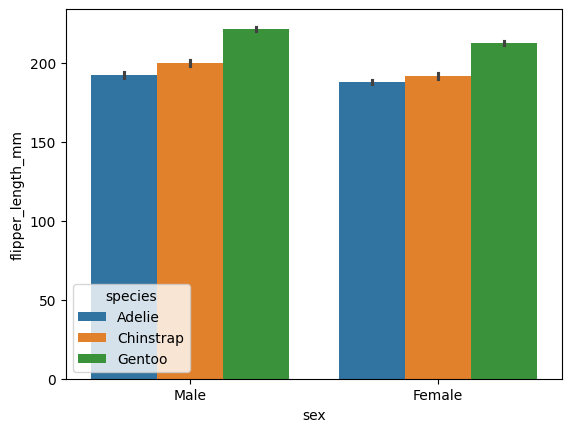

In [142]:
sns.barplot(data=df, x="sex", y="flipper_length_mm", hue="species")

In [127]:
df = sns.load_dataset("exercise")
df = df.iloc[:, 1:]
df

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


<Axes: xlabel='pulse'>

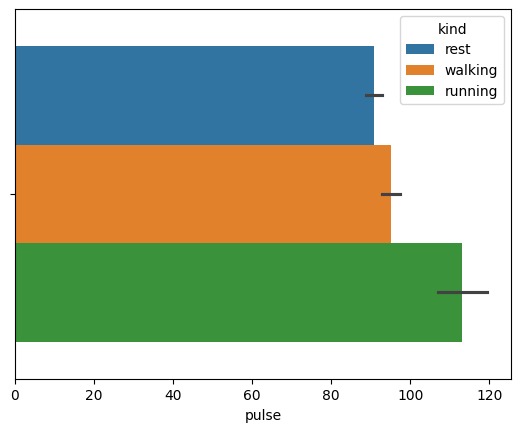

In [136]:
sns.barplot(data=df, x="pulse", hue="kind")

In [ ]:
df.loc[df["kind"] == "rest", "pulse"]

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
5,2,low fat,93,30 min,rest
6,3,low fat,97,1 min,rest
7,3,low fat,97,15 min,rest
8,3,low fat,94,30 min,rest
9,4,low fat,80,1 min,rest


In [8]:
x = input()
print(x)

Hello World!


In [3]:
print('print("Hello\\nWorld")')

print("Hello\nWorld")


In [1]:
print('print("Hello\\nWorld")')

print("Hello\nWorld")
